# **Classification Model for Predicting Deposit Customers**

## **Business Overview and Problem**

#### **Business Overview and Problem**

`Term deposits` are a widely recognized financial product where customers deposit a certain amount of money with the bank or financial institution. The uniqueness lies in the fact that this money is bound for a specific period, and withdrawals can only be made after the agreed-upon term. In return, customers receive a fixed interest rate based on the deposited amount.
In the competitive realm of financial institutions, customer retention and acquisition are paramount. Despite the popularity of term deposits, ABC Bank, like its peers, is constantly seeking ways to attract and retain customers. This is where marketing campaigns come into play.


The primary business problem is `to enhance efficiency in terms of time and cost for the campaigns` , and also `to optimize the effectiveness of marketing campaigns to target the right audience`. Understanding which customers are more likely to subscribe to term deposits can significantly contribute to the success rate of these campaigns.

#### **How Does Machine Learning help us solving this Problem ?**

In leveraging historical data, we employ a cutting-edge `machine learning classification model to categorize specific customers into groups – those likely to make a deposit and those who are not`. This prediction is based on various characteristics that will be further discussed.

The primary objective of this predictive modeling is aims to enhance cost and time efficiency in marketing efforts. By precisely identifying potential depositors through data-driven insights, the bank can optimize resource allocation and minimize unnecessary expenditures.

Secondly, the modeling endeavors to refine the targeting precision of marketing campaigns conducted by ABC Bank. The goal is to ensure that marketing initiatives are not only cost-effective but also laser-focused on customers with a high likelihood of making a deposit. This strategic approach is poised to elevate the overall effectiveness of ABC Bank's marketing endeavors.

In essence, the application of machine learning in this predictive modeling process is anticipated to streamline marketing operations, making them more resource-efficient and ensuring that campaigns resonate with the most promising audience. This, in turn, positions ABC Bank to engage with potential depositors more effectively, ultimately driving the bank's success in attracting valuable customers.

## **Define Evaluation Metrics**

- Positive (1) = Deposit
- Negative (0) = Not Deposit


- True Positive (TP) = Customers predicted to make a deposit, actually proceed with a deposit
- True Negative (TN) = Customers predicted to make a deposit, but in reality, do not proceed with a deposit
- False Positive (FP) = Customers predicted to make a deposit, indeed do not make a deposit
- False Negative (FN) = Customers predicted not to make a deposit, but in reality, proceed with a deposit

- `The consequence of a False Positive` is the inefficient allocation of time and cost for a campaign because we reach out to individuals predicted to potentially make a deposit, but they do not actually proceed with it.
- `The consequence of a False Negative` is the potential loss of customers who could make a deposit because, according to our prediction, these customers are not expected to proceed with a deposit.

From the consequences, we can observe that both aspects hold an equal proportion of importance. Considering the business problem we aim to address, we cannot emphasize only one risk. In addition to enhancing efficiency in terms of time and cost for campaigns, the machine learning model we create should also optimize these marketing initiatives for the right target customers. Therefore, we will employ the `F1-Score` evaluation metric to strike a balance between precision and recall, ensuring the model's effectiveness in achieving both objectives.

## **Data Understanding**

In [45]:
# Library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# for Cross Val
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# for Metrics
from sklearn.metrics import classification_report, f1_score

# for Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# other models 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import category_encoders as ce

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import category_encoders as ce

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix


In [46]:
# Load Data

bank = pd.read_csv('data_bank_marketing_campaign.csv')

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)

bank.head(20)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no


##### **Data Info**

In [47]:
# Data shape Check

p,q = bank.shape
print(f'Raw data consist of : {p} rows , {q} columns')

Raw data consist of : 7813 rows , 11 columns


The raw data (before cleaning) consists of 7813 rows and 11 columns. Each row represents personal information for individual customers, specifying whether the customer has chosen to take a deposit or not.

In [48]:
# Unique Values check

pd.set_option('display.max_colwidth', None)

unique = []
for i in bank.columns :
    unique.append( [i, bank[i].nunique(), bank[i].unique()])

show = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique)
show

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


`Column Descriptions`

1. **age:** Column containing the age of customers, ranging from 18 to 95 years.

2. **job:** Column indicating the occupation of customers, comprising 11 different occupations plus "unknown" to describe cases where the customer's occupation is not known.

3. **balance:** Column containing the balance of customers, with a range from USD -6874 to USD 66653.

4. **housing:** Column indicating whether the customer has a housing loan, with values "YES" or "NO."

5. **loan:** Column indicating whether the customer has any other loans, with values "YES" or "NO."

6. **contact:** Column specifying the type of communication used to deliver campaigns to customers. It includes options such as cellular, telephone, and "unknown" for cases where the communication type is not known.

7. **month:** Column providing information on the month (January to December) when the customer was last contacted.

8. **campaign:** Column indicating the number of contacts made during the campaign, ranging from 1 to a maximum of 63 times.

9. **pdays:** Column representing the number of days elapsed since the customer was last contacted from the previous campaign. A value of "-1" indicates that the customer was not contacted again.

10. **poutcome:** Column indicating the outcome of the previous campaign, including successful, failed, other, and unknown outcomes.

11. **deposit:** Column indicating whether the customer made a deposit, with values "YES" or "NO."

##### **Define Numerical and Categorical Columns**

In [49]:
# Define Numerical Columns
num_col = bank.select_dtypes(include=['number']).columns
num_col

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

Given the dataset with four numeric columns, namely `age, balance, campaign, and pdays`, we can leverage this information to perform various analyses.

In [50]:
# Define Categorical columns
cat_col = bank.select_dtypes(include=['object', 'category']).columns
cat_col

Index(['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'], dtype='object')

And there are seven non-numeric columns in this dataset, namely `job, housing, loan, contact, month, poutcome, deposit`. This information can be utilized to identify the columns that need encoding during the preprocessing step.

##### **Numerical Columns values Distribution**

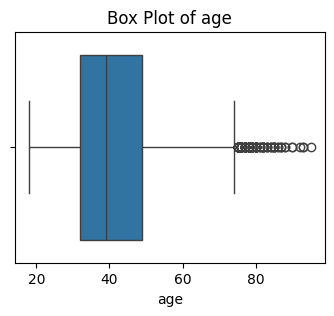

Skewness of age: 0.867620162363191
Shapiro-Wilk p-value for age: 0.0
The distribution of age does not appear to be normal.


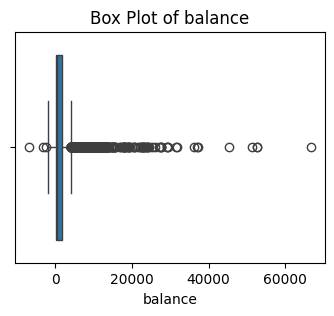

Skewness of balance: 6.760662339910582
Shapiro-Wilk p-value for balance: 0.0
The distribution of balance does not appear to be normal.


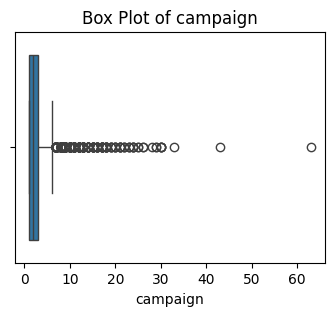

Skewness of campaign: 5.538155830068887
Shapiro-Wilk p-value for campaign: 0.0
The distribution of campaign does not appear to be normal.


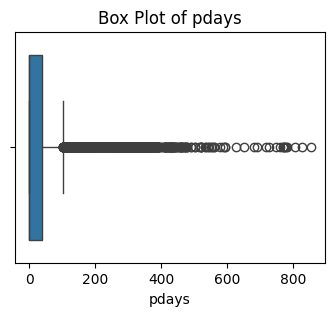

Skewness of pdays: 2.411313346636048
Shapiro-Wilk p-value for pdays: 0.0
The distribution of pdays does not appear to be normal.


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

for col in num_col:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=bank[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

    # Calculating skewness
    skewness = bank[col].skew()
    print(f'Skewness of {col}: {skewness}')

    # Normality test (Shapiro-Wilk Test)
    stat, p_value = shapiro(bank[col])
    print(f'Shapiro-Wilk p-value for {col}: {p_value}')

    # Determining whether the distribution appears normal based on p-value
    if p_value > 0.05:
        print(f'The distribution of {col} appears to be normal.')
    else:
        print(f'The distribution of {col} does not appear to be normal.')


The boxplots above demonstrate that `none of the numeric columns` in this dataset follow a `normal distribution`. This information will be utilized to decide which correlation test to employ in order to determine the features for the modeling process.

## **Data Cleaning**

#### **Duplicates**

In [52]:
# Call duplicates data

duplicates = bank[bank.duplicated()]
display(duplicates)
print(f'There are {len(duplicates)} duplicate records in this dataset.')

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


There are 8 duplicate records in this dataset.


In [53]:
df_new = bank[['job', 'contact', 'poutcome']]

df_new[(df_new['poutcome'] != 'unknown') & (df_new['poutcome'] != 'other')]


,job,contact,poutcome
7,technician,cellular,failure
10,student,cellular,success
15,technician,cellular,success
18,technician,cellular,success
19,management,cellular,success
...,...,...,...
7796,student,cellular,failure
7798,unemployed,cellular,success
7802,retired,telephone,failure
7804,admin.,cellular,failure


To handle the presence of 8 duplicate data, we will proceed to drop them from the dataset.

In [54]:
bank.drop_duplicates(inplace=True) # Remove duplicates data

# Check data shape after duplicates removal
p,q = bank.shape
print(f'Raw data consist of : {p} rows , {q} colulmns')

Raw data consist of : 7805 rows , 11 colulmns


8 duplicate records have been dropped, leaving a total of 7805 rows in the dataset.

#### **Anomalies**

- Changing values in the target variable to facilitate prediction. The value `yes` will be replaced with `1`, and the value `no` will be replaced with `0`.

In [55]:
bank['deposit'] = bank['deposit'].replace({'yes': 1, 'no': 0}) # Replace target's values

In [56]:
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


- Remove `unknown` values

In [57]:
# Define percentage counts unknown values on contact, job, and poutcome column

unk_cont = round((len(bank[bank['contact']=='unknown'])/len(bank))*100,1)
unk_job = round((len(bank[bank['job']=='unknown'])/len(bank))*100,1)
unk_poutcome = round((len(bank[bank['poutcome']=='unknown'])/len(bank))*100,1)

print(f'Values Unknown count in contact column is {unk_cont}%')
print(f'Values Unknown count in job column is {unk_job}%')
print(f'Values Unknown count in poutcome column is {unk_poutcome}%')

Values Unknown count in contact column is 21.0%
Values Unknown count in job column is 0.7%
Values Unknown count in poutcome column is 74.5%


- We only handle `unknown` values on `job` and `contact` columns. Because `poutcome` column has 74% `unknown` values. It's too much numbers to dropped because can affect to the model accuracy.

In [58]:
# remove every rows that has 'unknown' values on contact column
bank = bank.drop(index=list(bank[bank['contact']=='unknown'].index))

In [59]:
# remove every rows that has 'unknown' values on job columns
bank = bank.drop(index=list(bank[bank['job']=='unknown'].index))

In [60]:
# Check data shape after remove anomalies
p,q = bank.shape
print(f'Raw data consist of : {p} rows , {q} columns')

Raw data consist of : 6123 rows , 11 columns


In [61]:
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,0
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


#### **Missing Value**

In [62]:
# Check Missing Values percentage
bank.isna().sum()/ bank.shape[0] * 100

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
dtype: float64

There is no missing value records in this dataset

#### **Outliers**

In [63]:
# Statistics Descriptive from numerical columns
bank[['age','balance', 'campaign', 'pdays']].describe()

,age,balance,campaign,pdays
count,6123.000000,6123.000000,6123.000000,6123.000000
mean,41.425772,1614.830639,2.450923,64.250041
std,12.481787,3253.892816,2.504423,115.344781
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,145.000000,1.000000,-1.000000
50%,38.000000,596.000000,2.000000,-1.000000
75%,49.000000,1812.000000,3.000000,95.000000
max,95.000000,66653.000000,43.000000,854.000000


In [64]:
outliers_info = []

# Calculating outliers for each numeric column
for col in bank.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = bank[col].quantile(0.25)
    Q3 = bank[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((bank[col] < lower_bound) | (bank[col] > upper_bound)).sum()
    total_count = bank[col].count()
    
    outliers_info.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers_count,
        'Outliers Percentage': (outliers_count / total_count) * 100
    })

# Displaying the DataFrame containing outliers information
outliers_bank = pd.DataFrame(outliers_info)
outliers_bank


,Column,Lower Bound,Upper Bound,Outliers Count,Outliers Percentage
0,age,6.5,74.5,118,1.927160
1,balance,-2355.5,4312.5,558,9.113180
2,campaign,-2.0,6.0,301,4.915891
3,pdays,-145.0,239.0,624,10.191083
4,deposit,-1.5,2.5,0,0.000000


- In the `age` column, there are 118 outliers below 6.5 and above 74.5, accounting for 1.9% of the total data.
- In the `balance` column, there are 558 outliers below -2355.5 and above 4312.5, constituting 9.1% of the total data.
- In the `campaign` column, there are 301 outliers below -2.0 and above 6.0, representing 4.9% of the total data.
- In the `pdays` column, there are 624 outliers below 145 and above 230, making up 10.2% of the total data.

These outliers are not handled or dropped as they represent real data points reflecting the characteristics of their respective columns. It is anticipated that when scaling is performed, a Robust Scaler will be used since it performs better in handling outliers.

#### **Cleaned Data**

Four data examination processes were conducted during data cleaning: checking for duplicate data, inspecting missing values, identifying outliers, and examining anomalies. However, only two data cleaning actions were performed, which involved removing duplicate data and addressing anomalies. Moreover, there are no missing values in this dataset. Concerning outliers, all numerical columns in this dataset exhibit outliers ranging from 1.9%, 9.1%, 4.9% to 10.2%. However, the decision was made to retain the outliers for inclusion in the modeling process due to several considerations, such as outliers representing real and crucial data. Deleting them might lead to suboptimal learning as it could result in a loss of valuable information. Therefore, the following is the cleaned `bank` dataframe, ready for further processing stages:

In [65]:
# Call final cleaned dataframe
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,0
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


In [66]:
# Check cleaned data shape
p,q = bank.shape
print(f'Raw data consist of : {p} rows , {q} columns')

Raw data consist of : 6123 rows , 11 columns


## **Exploratory Data Analysis**

#### **Proportion of Deposit and No Deposit Data**

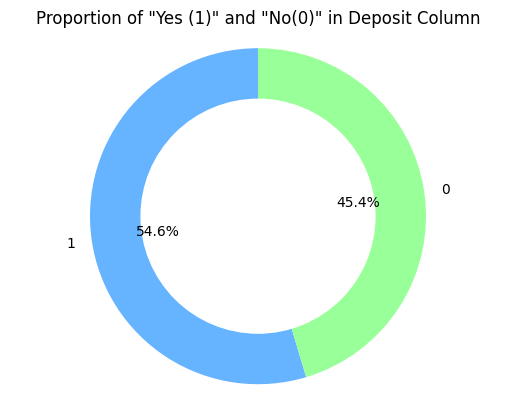

In [67]:
import matplotlib.pyplot as plt

# Menghitung proporsi "Yes" dan "No" pada kolom "deposit"
deposit_counts = bank['deposit'].value_counts()

# Membuat donut pie chart
fig, ax = plt.subplots()
ax.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Menambahkan label pada tengah donut chart

plt.title('Proportion of "Yes (1)" and "No(0)" in Deposit Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


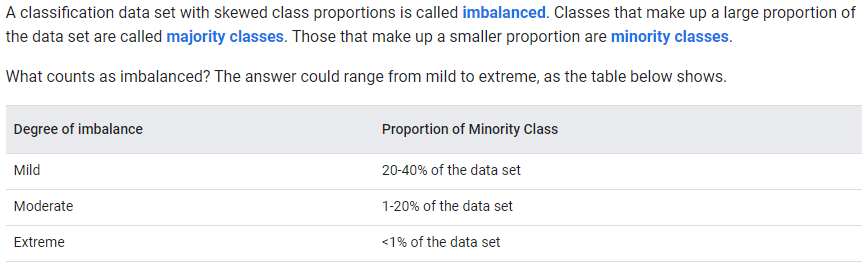

`Source` https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

Quoting from the `Google Developer` website, data imbalance refers to data with a minority class proportion starting from 40%. This dataset has a minority class proportion of 45.4%, hence it is considered as a `Balanced` dataset, and therefore, there is `no need` for resampling.

#### **Value Counts of job**

In [68]:
# Menghitung jumlah unik pekerjaan (job) untuk deposit = 1
deposit_1_counts = bank[bank['deposit'] == 1]['job'].value_counts().reset_index()
deposit_1_counts.columns = ['job', 'count_deposit_1']

# Menghitung jumlah unik pekerjaan (job) untuk deposit = 0
deposit_0_counts = bank[bank['deposit'] == 0]['job'].value_counts().reset_index()
deposit_0_counts.columns = ['job', 'count_deposit_0']

# Menggabungkan hasil perhitungan ke dalam satu DataFrame
result_bank = pd.merge(deposit_1_counts, deposit_0_counts, on='job', how='outer').fillna(0)
result_bank

,job,count_deposit_1,count_deposit_0
0,management,848,678
1,technician,538,493
2,admin.,400,345
3,blue-collar,399,477
4,retired,349,130
5,services,224,245
6,student,183,55
7,unemployed,137,76
8,self-employed,118,105
9,entrepreneur,84,98


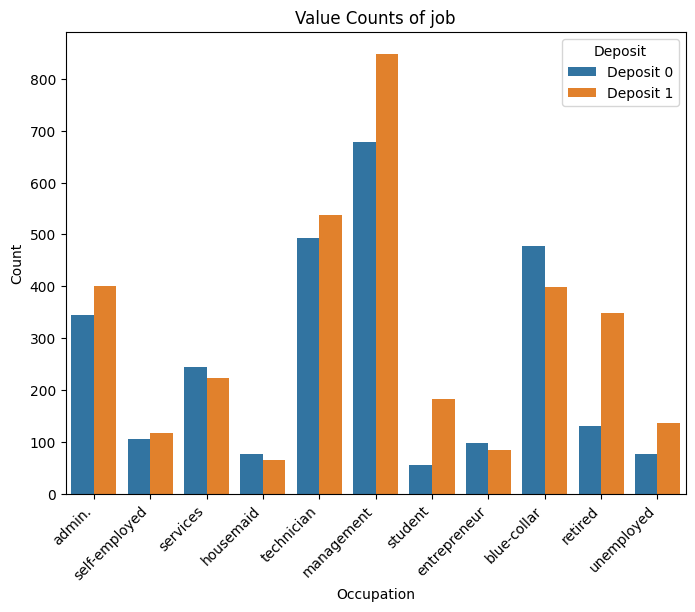

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='job', hue='deposit', data=bank)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Value Counts of job')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Value Counts of Housing**

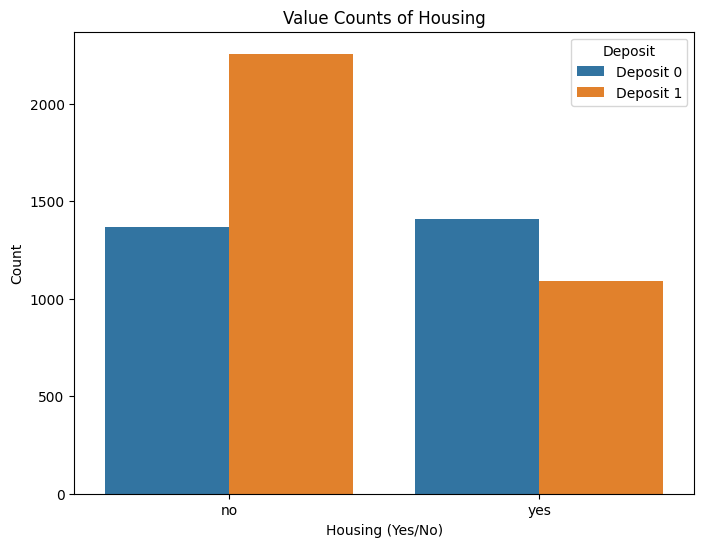

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', hue='deposit', data=bank)
plt.xlabel('Housing (Yes/No)')
plt.ylabel('Count')
plt.title('Value Counts of Housing')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.show()

#### **Value Counts of Loan**

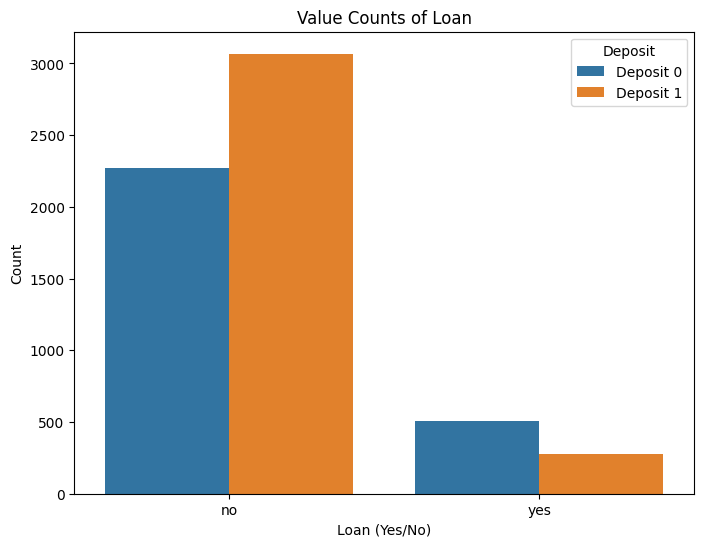

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='deposit', data=bank)
plt.xlabel('Loan (Yes/No)')
plt.ylabel('Count')
plt.title('Value Counts of Loan')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.show()

#### **Value Counts of Contact**

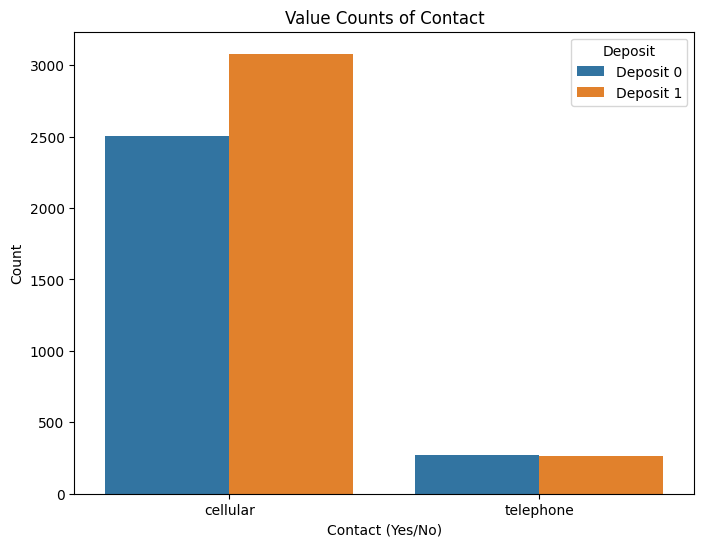

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='deposit', data=bank)
plt.xlabel('Contact (Yes/No)')
plt.ylabel('Count')
plt.title('Value Counts of Contact')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.show()

#### **Value Counts of Month**

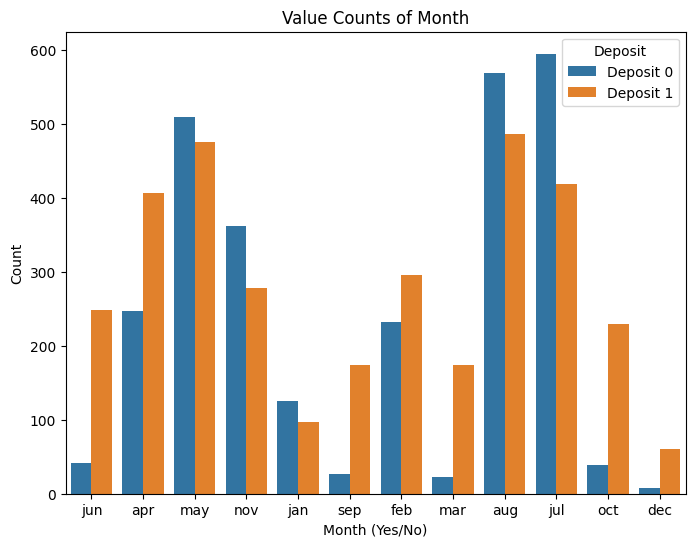

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='month', hue='deposit', data=bank)
plt.xlabel('Month (Yes/No)')
plt.ylabel('Count')
plt.title('Value Counts of Month')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.show()

#### **Value Counts of Campaign**

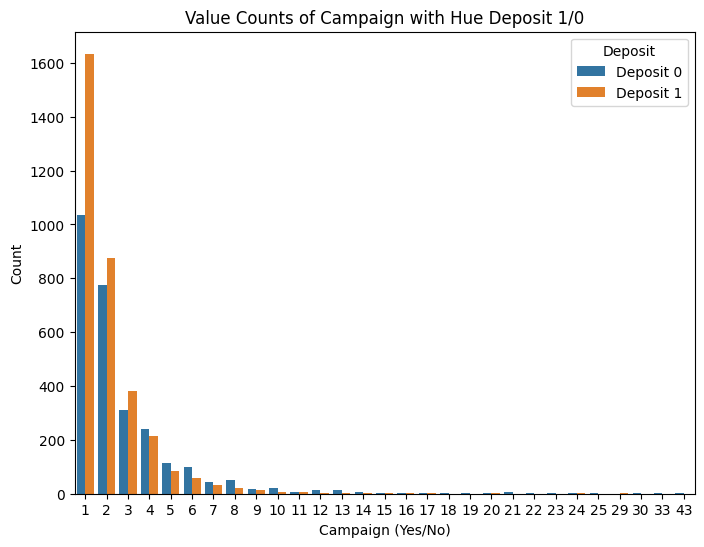

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='campaign', hue='deposit', data=bank)
plt.xlabel('Campaign (Yes/No)')
plt.ylabel('Count')
plt.title('Value Counts of Campaign with Hue Deposit 1/0')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.show()

#### **Value Counts of Poutcome**

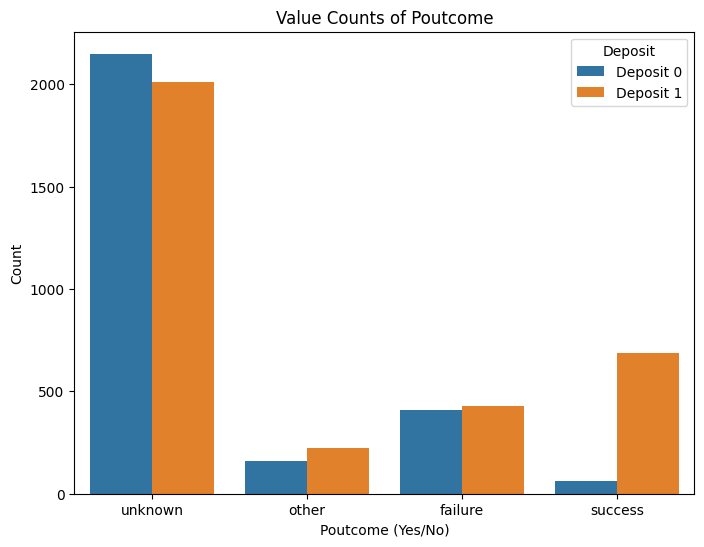

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='deposit', data=bank)
plt.xlabel('Poutcome (Yes/No)')
plt.ylabel('Count')
plt.title('Value Counts of Poutcome')
plt.legend(title='Deposit', loc='upper right', labels=['Deposit 0', 'Deposit 1'])
plt.show()

## **Correlation Test Features to Target**

#### **Correlation Between Numerical Features and Target**

- Given that we have 4 numerical features : `age`, `balance`, `campaign`, and `pdays`
- From the distribution test, we know that all numerical features are not normally distributed
- So we use spearman to check the correlation between numerical features to target (deposit) 

In [76]:
from scipy.stats import spearmanr


# Define p-value threshold
alpha = 0.05

# Calculate Spearman correlation for each column
corr_age, p_age = spearmanr(bank['age'], bank['deposit'])
corr_balance, p_balance = spearmanr(bank['balance'], bank['deposit'])
corr_campaign, p_campaign = spearmanr(bank['campaign'], bank['deposit'])
corr_pdays, p_pdays = spearmanr(bank['pdays'], bank['deposit'])

# Check correlation based on p-value
def check_correlation(corr, p_value, alpha):
    if p_value < alpha:
        print(f"Correlation is significant: Spearman correlation = {corr:.4f}, p-value = {p_value:.4f}")
    else:
        print(f"Correlation is not significant: Spearman correlation = {corr:.4f}, p-value = {p_value:.4f}")

# Check correlation for each variable
print("Age vs Deposit:")
check_correlation(corr_age, p_age, alpha)

print("\nBalance vs Deposit:")
check_correlation(corr_balance, p_balance, alpha)

print("\nCampaign vs Deposit:")
check_correlation(corr_campaign, p_campaign, alpha)

print("\nPdays vs Deposit:")
check_correlation(corr_pdays, p_pdays, alpha)

Age vs Deposit:
Correlation is not significant: Spearman correlation = 0.0080, p-value = 0.5304

Balance vs Deposit:
Correlation is significant: Spearman correlation = 0.1721, p-value = 0.0000

Campaign vs Deposit:
Correlation is significant: Spearman correlation = -0.1407, p-value = 0.0000

Pdays vs Deposit:
Correlation is significant: Spearman correlation = 0.1582, p-value = 0.0000


- `age:`
The correlation test indicates a non-significant relationship between age and deposit decisions (Spearman correlation = 0.0080, p-value = 0.5304). Age seems to have limited influence on predicting deposit outcomes.

- `Balance:`
A significant positive correlation is found between account balance and deposit decisions (Spearman correlation = 0.1721, p-value = 0.0000). Higher balances are associated with a greater likelihood of making a deposit, highlighting the importance of account balance as a predictor.

- `Campaign:`
There's a significant negative correlation between the number of campaign contacts and deposit decisions (Spearman correlation = -0.1407, p-value = 0.0000). A higher number of contacts is linked to a lower probability of making a deposit, emphasizing the impact of campaign intensity on deposit decisions.

- `Pdays:`
A significant positive correlation is observed between the days since the last contact and deposit decisions (Spearman correlation = 0.1582, p-value = 0.0000). A longer duration since the last contact is associated with an increased likelihood of making a deposit, highlighting the temporal aspect in influencing deposit outcomes.

#### **Correlation Between Categorical Features and Target**

- Given that we have 6 categorical features : `job`, `housing`, `loan`,`contact`, `month`, and `poutcome`
- From the values of each categorical features, we know that all categorical feature values are `Biner`
- So we use Chi-squared test to check the correlation between categorical features to target (deposit) 

In [77]:
# Membuat cross-tabulation antara kolom kategorik dan target
for column in ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    contingency_table = pd.crosstab(bank[column], bank['deposit'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-Square test for {column} vs deposit: p-value = {p}')


Chi-Square test for job vs deposit: p-value = 1.772652591444524e-31
Chi-Square test for housing vs deposit: p-value = 5.203311739745451e-47
Chi-Square test for loan vs deposit: p-value = 7.44291104590585e-31
Chi-Square test for contact vs deposit: p-value = 0.013097105397765823
Chi-Square test for month vs deposit: p-value = 8.37886904046444e-122
Chi-Square test for poutcome vs deposit: p-value = 1.327998962406088e-105


- `Job vs Deposit:`
   The Chi-Square test results indicate a highly significant correlation (p-value = 1.77e-31) between occupation (job) and the decision to make a deposit. This suggests that the type of occupation may serve as a strong predictor for deposit decisions, providing valuable insights for understanding the influence of job roles on deposit outcomes.

- ``Housing vs Deposit:``
   The Chi-Square test reveals a highly significant correlation (p-value = 5.20e-47) between housing ownership (housing) and deposit decisions. The results imply that the possession of a house can significantly impact the likelihood of making a deposit, emphasizing the relevance of housing status in predicting deposit outcomes.

- ``Loan vs Deposit:``
   The Chi-Square test shows a substantial correlation (p-value = 7.44e-31) between loan status (loan) and deposit decisions. This suggests that the presence of an existing loan can influence the decision to make a deposit, indicating the importance of loan information in predicting deposit outcomes.

- ``Contact vs Deposit:``
   Although a correlation is observed between contact method (contact) and deposit decisions (p-value = 0.0131), it is less significant compared to other variables. Further analysis may be needed to determine the strength and nature of this relationship, suggesting that the method of contact may have a more nuanced impact on deposit decisions.

- ``Month vs Deposit:``
   The Chi-Square test shows an extremely significant correlation (p-value = 8.38e-122) between the month of the year (month) and deposit decisions. This implies that the month can be a crucial factor in predicting deposit outcomes, indicating a seasonality or temporal influence on banking deposit decisions.

- ``Poutcome vs Deposit:``
   The Chi-Square test demonstrates a highly significant correlation (p-value = 1.33e-105) between the outcome of previous marketing campaigns (poutcome) and deposit decisions. This emphasizes the importance of past campaign results as a robust predictor for understanding and forecasting deposit outcomes.

## **Modelling - Benchmarking Model**

In [78]:
# Define x and y

x = bank.drop(columns=['deposit'])
y = bank[['deposit']]

In [79]:
# Splitting Data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2060, stratify=y)
x_train.shape, x_test.shape

((4898, 10), (1225, 10))

In [80]:
# Define the features that need feature engineering

categorical_features_ohe = ['housing', 'loan', 'contact','poutcome']
categorical_features_be = ['job', 'month']
numeric_features_scaler = ['age', 'balance', 'campaign', 'pdays']

# Create a ColumnTransformer

feature_engineering = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), categorical_features_ohe),
    ('BE', ce.BinaryEncoder(), categorical_features_be),
    ('scaler', RobustScaler(), numeric_features_scaler)
], remainder='passthrough')

feature_engineering

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('BE', BinaryEncoder(), ['job', 'month']),
                                ('scaler', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

In [81]:
# Define the models

logreg = LogisticRegression()
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
gradient_boosting = GradientBoostingClassifier()
xgboost_model = XGBClassifier()

models = [logreg, svm_linear, svm_rbf, decision_tree, random_forest, knn, naive_bayes, gradient_boosting, xgboost_model]

`explaination For the model used:`
1. **Logistic Regression (logreg):**
   - **Methodology:** Logistic Regression is a linear model used for binary classification tasks.
   - **Prediction Process:** It calculates the weighted sum of input features and applies a logistic function to produce probabilities. A threshold is then applied to classify instances into different classes.

2. **Support Vector Machine with Linear Kernel (svm_linear):**
   - **Methodology:** SVM aims to find a hyperplane that best separates different classes in the feature space.
   - **Prediction Process:** For linear SVM, it calculates the decision boundary as a hyperplane in the input feature space. The distance of data points from this hyperplane determines the predicted class.

3. **Support Vector Machine with Radial Basis Function Kernel (svm_rbf):**
   - **Methodology:** Similar to linear SVM but uses a non-linear radial basis function (RBF) kernel to handle non-linear decision boundaries.
   - **Prediction Process:** It transforms the input features into a higher-dimensional space, making it possible to find a hyperplane that separates the classes in this transformed space.

4. **Decision Tree (decision_tree):**
   - **Methodology:** Decision Trees recursively split the dataset based on the most informative features.
   - **Prediction Process:** It traverses the tree from the root to a leaf node based on the values of input features, and the leaf node determines the predicted class.

5. **Random Forest (random_forest):**
   - **Methodology:** Random Forest is an ensemble of Decision Trees, where multiple trees vote on the final prediction.
   - **Prediction Process:** Each tree in the forest independently predicts the class, and the final prediction is often the majority vote among the trees.

6. **K-Nearest Neighbors (knn):**
   - **Methodology:** KNN classifies instances based on the majority class of their k-nearest neighbors in the feature space.
   - **Prediction Process:** It calculates the distance between the input instance and all other instances in the training set. The class is determined by the majority class among the k-nearest neighbors.

7. **Naive Bayes (naive_bayes):**
   - **Methodology:** Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features.
   - **Prediction Process:** It calculates the probability of each class given the input features using Bayes' theorem and selects the class with the highest probability.

8. **Gradient Boosting (gradient_boosting):**
   - **Methodology:** Gradient Boosting builds an ensemble of weak learners (typically decision trees) in a sequential manner.
   - **Prediction Process:** It combines the predictions of multiple weak learners, with each new learner focused on correcting the errors made by the ensemble so far.

9. **XGBoost (xgboost_model):**
   - **Methodology:** XGBoost is an optimized implementation of gradient boosting.
   - **Prediction Process:** Similar to gradient boosting, XGBoost builds an ensemble of weak learners. It includes regularization terms and utilizes a more advanced optimization algorithm for enhanced performance.

In [82]:
# Create Pipeline

rucika = Pipeline([
    ('Preprocessing', feature_engineering),
    ('Model', models)
])

print(rucika)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('BE', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('scaler', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('Model',
                 [LogisticRegression(), SVC(kernel='linear'), SVC(),
                  DecisionTreeClassifier...
                                grow_policy=None, importance_type=None,
                                interaction_const

In [83]:
# Loop through each model

mean_bench_mod_1 = [] 
std_bench_mod_1 = []

for model in models:
    # Create a pipeline for the current model
    rucika = Pipeline([
        ('Preprocessing', feature_engineering),
        ('Model', model)
    ])

    # Cross-validation for F1-Score
    mod_bench_f1 = cross_val_score(estimator=rucika, X=x_train, y=y_train, cv=5, scoring='f1', error_score='raise')
    
    mean_bench_mod_1.append(mod_bench_f1.mean())
    std_bench_mod_1.append(mod_bench_f1.std())

In [84]:
# DataFrame to compare Benchmarked Model

pd.DataFrame({
    'model': ['Logistic Regression', 'svm_linear', 'svm_rbf', 'Decision Tree', 'Random Forest', 'KNN', 'naive_bayes', 'Gradient Boost', 'XGBoost'],
    'F1score - mean': [round(score * 100, 1) for score in mean_bench_mod_1],
    'std': std_bench_mod_1,
}).sort_values('F1score - mean', ascending=False)


,model,F1score - mean,std
7,Gradient Boost,70.2,0.018888
2,svm_rbf,69.6,0.015887
4,Random Forest,69.6,0.015078
8,XGBoost,69.3,0.009667
0,Logistic Regression,67.7,0.016859
5,KNN,67.1,0.018212
1,svm_linear,66.9,0.014655
3,Decision Tree,63.4,0.006077
6,naive_bayes,61.6,0.007889


The two models with the highest mean F1-Score are `Gradient Boost` with 70.2% and `SVM - RBF` with 69.6%. However, since the F1-Score values for `XGBoost` and `Random Forest` are not significantly different from SVM-RBF, they will also be included in the tuning process. Therefore, we will be tuning a total of four models.

## **Hyperparameter Tuning**

#### **Tune_GradientBoostClss**

In [85]:
rucika_Tune_GBC = Pipeline([
    ('Preprocessing', feature_engineering),
    ('Model_GBC', GradientBoostingClassifier())
])

In [86]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'Model_GBC__n_estimators': [50, 100, 200],
    'Model_GBC__learning_rate': [0.01, 0.1, 0.2],
    'Model_GBC__max_depth': [3, 5, 7],
    'Model_GBC__min_samples_split': [2, 5, 10],
    'Model_GBC__min_samples_leaf': [1, 2, 4],
    'Model_GBC__subsample': [0.8, 0.9, 1.0],
    'Model_GBC__max_features': ['auto', 'sqrt', 'log2', None]
}

random_search_gb = RandomizedSearchCV(
    estimator=rucika_Tune_GBC,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5,  
    random_state=2060,
    verbose=1,
    n_jobs=-1
)

random_search_gb.fit(x_train, y_train)

best_params_gb = random_search_gb.best_params_
best_model_gb = random_search_gb.best_estimator_

print("Hyperparameter Terbaik untuk GradientBoostingClassifier:")
print(best_params_gb)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Hyperparameter Terbaik untuk GradientBoostingClassifier:
{'Model_GBC__subsample': 0.9, 'Model_GBC__n_estimators': 50, 'Model_GBC__min_samples_split': 5, 'Model_GBC__min_samples_leaf': 2, 'Model_GBC__max_features': 'log2', 'Model_GBC__max_depth': 3, 'Model_GBC__learning_rate': 0.01}


In [87]:
# Setelah fitting, dapatkan skor F1 terbaik
best_f1_score_gb = random_search_gb.best_score_
# Print skor F1 terbaik
print(f"Best F1 Score: {best_f1_score_gb:.4f}")

Best F1 Score: 0.7138


#### **Tune_SVM**

In [88]:
rucika_Tune_SVM_rbf_random = Pipeline([
    ('Preprocessing', feature_engineering),
    ('Model_SVM_rbf', SVC(kernel='rbf'))
])

from sklearn.model_selection import RandomizedSearchCV

param_dist_svm_rbf = {
    'Model_SVM_rbf__C': [0.1, 1, 10, 100],
    'Model_SVM_rbf__gamma': ['scale', 'auto', 0.1, 0.01, 1, 10],
    'Model_SVM_rbf__kernel': ['rbf']
}

random_search_svm_rbf = RandomizedSearchCV(
    estimator=rucika_Tune_SVM_rbf_random,
    param_distributions=param_dist_svm_rbf,
    n_iter=50,
    scoring='f1',
    cv=5,
    random_state=2060,
    verbose=1,
    n_jobs=-1
)

random_search_svm_rbf.fit(x_train, y_train)

best_params_svm_rbf_random = random_search_svm_rbf.best_params_
best_model_svm_rbf_random = random_search_svm_rbf.best_estimator_

print("Hyperparameter Terbaik untuk SVM (RBF Kernel - Random Search):")
print(best_params_svm_rbf_random)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Hyperparameter Terbaik untuk SVM (RBF Kernel - Random Search):
{'Model_SVM_rbf__kernel': 'rbf', 'Model_SVM_rbf__gamma': 1, 'Model_SVM_rbf__C': 0.1}


In [89]:
# Setelah fitting, dapatkan skor F1 terbaik
best_f1_score_svm_rbf_random = random_search_svm_rbf.best_score_

# Print skor F1 terbaik
print(f"Best F1 Score for SVM (RBF Kernel - Random Search): {best_f1_score_svm_rbf_random:.4f}")

Best F1 Score for SVM (RBF Kernel - Random Search): 0.7068


#### **Tune_RandomForest**

In [90]:
rucika_Tune_RF = Pipeline([
    ('Preprocessing', feature_engineering),
    ('Model_RF', RandomForestClassifier())
])

from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'Model_RF__n_estimators': [50, 100, 200],
    'Model_RF__max_features': ['auto', 'sqrt', 'log2', None],
    'Model_RF__max_depth': [None, 10, 20, 30],
    'Model_RF__min_samples_split': [2, 5, 10],
    'Model_RF__min_samples_leaf': [1, 2, 4],
    'Model_RF__bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rucika_Tune_RF,
    param_distributions=param_dist_rf,
    n_iter=50,
    scoring='f1',
    cv=5,
    random_state=2060,
    verbose=1,
    n_jobs=-1
)

random_search_rf.fit(x_train, y_train)

best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

# Print skor F1 terbaik
print("Hyperparameter Terbaik untuk Random Forest:")
print(best_params_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Hyperparameter Terbaik untuk Random Forest:
{'Model_RF__n_estimators': 200, 'Model_RF__min_samples_split': 10, 'Model_RF__min_samples_leaf': 2, 'Model_RF__max_features': 'log2', 'Model_RF__max_depth': None, 'Model_RF__bootstrap': True}


In [91]:
# Setelah fitting, dapatkan skor F1 terbaik
best_f1_score_rf = random_search_rf.best_score_

print(f"Best F1 Score for Random Forest: {best_f1_score_rf:.4f}")

Best F1 Score for Random Forest: 0.7062


#### **Tune_XGBClassifier**

In [92]:
rucika_Tune_xGBC = Pipeline([
    ('Preprocessing', feature_engineering),
    ('Model_xGBC', GradientBoostingClassifier())
])

In [93]:
rucika_Tune_GBC

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('BE', BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('scaler', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('Model_GBC', GradientBoostingClassifier())])

In [94]:
# Assuming 'feature_engineering' is your preprocessing step
rucika_Tune_xGBC = Pipeline([
    ('Preprocessing', feature_engineering),
    ('Model_xGBC', XGBClassifier())
])

# Parameter distribution for XGBClassifier
param_dist_xgb = {
    'Model_xGBC__n_estimators': [50, 100, 200, 300],
    'Model_xGBC__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'Model_xGBC__max_depth': [3, 5, 7, 10],
    'Model_xGBC__min_child_weight': [1, 3, 5],
    'Model_xGBC__subsample': [0.8, 0.9, 1.0],
    'Model_xGBC__colsample_bytree': [0.8, 0.9, 1.0],
    'Model_xGBC__gamma': [0, 1, 2, 3],
    'Model_xGBC__reg_alpha': [0, 0.1, 0.5, 1],
    'Model_xGBC__reg_lambda': [0.1, 1, 2, 5],
}

# RandomizedSearchCV for XGBClassifier using the pipeline
random_search_xgb = RandomizedSearchCV(
    estimator=rucika_Tune_xGBC,
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='f1',
    cv=5,
    random_state=2060,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV for XGBClassifier
random_search_xgb.fit(x_train, y_train)

# Get the best parameters
best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_

# Print the best parameters
print("Best Hyperparameters for XGBClassifier:")
print(best_params_xgb)
print("\n")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Hyperparameters for XGBClassifier:
{'Model_xGBC__subsample': 1.0, 'Model_xGBC__reg_lambda': 1, 'Model_xGBC__reg_alpha': 1, 'Model_xGBC__n_estimators': 50, 'Model_xGBC__min_child_weight': 1, 'Model_xGBC__max_depth': 10, 'Model_xGBC__learning_rate': 0.01, 'Model_xGBC__gamma': 2, 'Model_xGBC__colsample_bytree': 0.8}




In [95]:
# Setelah fitting, dapatkan skor F1 terbaik
best_f1_score_xGB = random_search_xgb.best_score_
# Print skor F1 terbaik
print(f"Best F1 Score: {best_f1_score_xGB:.4f}")

Best F1 Score: 0.7199


#### **Best 4 Models Tuned Result**

In [96]:
import pandas as pd

pd.DataFrame({
    'Tuned - model': ['Gradient Boost - Tuned', 'svm_rbf - Tuned', 'Random Forest - Tuned', 'XGradient Boost - Tuned'],
    'F1score_Tuned - mean': [round(best_f1_score_gb * 100, 1), round(best_f1_score_svm_rbf_random * 100, 1), round(best_f1_score_rf * 100, 1), round(best_f1_score_xGB * 100, 1)],
}).sort_values('F1score_Tuned - mean', ascending=False)

,Tuned - model,F1score_Tuned - mean
3,XGradient Boost - Tuned,72.0
0,Gradient Boost - Tuned,71.4
1,svm_rbf - Tuned,70.7
2,Random Forest - Tuned,70.6


## **Best Model**

| Model | F1score (%) |
|----|----|
|`XGradient Boost - Tuned` | `72` |
|Gradient Boost - Tuned | 71.6 |
|SVM_rbf - Tuned | 70.7 |
|Random Forest - Tuned | 70.5 |
|Gradient Boost | 70.2 |
|SVM_rbf| 69.6 |
|Random Forest| 69.3 |
|XGradient Boost| 69.3 |


The best-performing model with the highest F1 score is the tuned XGBoost (XGradient Boost) model. The optimized hyperparameters for this model are as follows:

- `subsample`: 1.0
- `reg_lambda`: 1 
- `reg_alpha`: 1 
- `n_estimators`: 50 
- `min_child_weight`: 1 
- `max_depth`: 10
- `learning_rate`: 0.01 
- `gamma`: 2
- `colsample_bytree`: 0.8

`Best Parameter Explaination`

1. **Subsample (subsample: 1.0):**
   - This parameter controls the subsample ratio of the training instances. A value of 1.0 means that all training instances are used for building each tree.

2. **Regularization Lambda (reg_lambda: 1):**
   - Lambda (λ) is the L2 regularization term on the weights. It helps prevent overfitting by penalizing large weight values.

3. **Regularization Alpha (reg_alpha: 1):**
   - Alpha (α) is the L1 regularization term on the weights. Like lambda, it contributes to the regularization process by penalizing large weight values.

4. **Number of Estimators (n_estimators: 50):**
   - It defines the number of boosting rounds (trees) to be built. In this case, 50 trees will be sequentially added to the ensemble.

5. **Minimum Child Weight (min_child_weight: 1):**
   - It specifies the minimum sum of instance weight needed in a child. A smaller value can lead to more complex trees.

6. **Maximum Depth (max_depth: 10):**
   - Maximum depth of a tree. It controls the depth of each tree in the ensemble.

7. **Learning Rate (learning_rate: 0.01):**
   - The learning rate shrinks the contribution of each tree. A lower learning rate requires more trees but may result in better generalization.

8. **Gamma (gamma: 2):**
   - Minimum loss reduction required to make a further partition on a leaf node. It helps control the complexity of the tree.

9. **Colsample Bytree (colsample_bytree: 0.8):**
   - It represents the fraction of features (columns) to be randomly sampled for each tree. A value of 0.8 means 80% of features will be considered for building each tree.

#### **Try best model to data test**

In [97]:
best_model_xgb = random_search_xgb.best_estimator_ #Define best model

best_model_xgb.fit(x_train,y_train) # Fitting best model to xtrain and ytrain

y_pred = best_model_xgb.predict(x_test) # Predict xtest with best model

f1_score(y_test,y_pred) # Call f1_score

0.7137654770575382

The model exhibits relatively good performance with an F1 score of approximately 72% on the training data and 71.3% on the test data. This suggests that the model can consistently make predictions on previously unseen data.

## **Confusion Metrics**

#### **Confusion Metrics**

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       556
           1       0.70      0.73      0.71       669

    accuracy                           0.68      1225
   macro avg       0.68      0.67      0.67      1225
weighted avg       0.68      0.68      0.68      1225



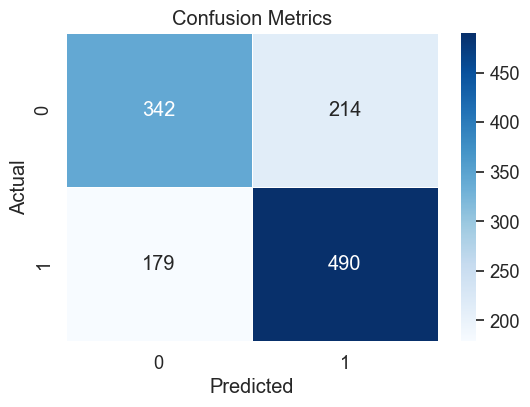

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat heatmap dengan label sumbu x dan y
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)

heatmap = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", linewidths=.5)
heatmap.set(xlabel='Predicted', ylabel='Actual')
plt.title('Confusion Metrics')
plt.show()

- True Positive (P = 1 | A = 1) = 490 peoples
- True Negative (P = 0 | A = 0) = 324 peoples
- False Positive (P = 1 | A = 0) = 214 peoples
- False Negative (P = 0 | A = 1) = 179 peoples

- Predicted 1 (Deposit) = TP 490 + FP 214 = 704 peoples
- Predicted 0 (Not Deposit) = TN 324 + FN 179 = 503 peoples

- Potential customers offered Deposit (According to Test Data) = 1225 peoples
- Actual customers who made a Deposit = TP + FN = 490 + 179 = 669 peoples

## **Features Importance**

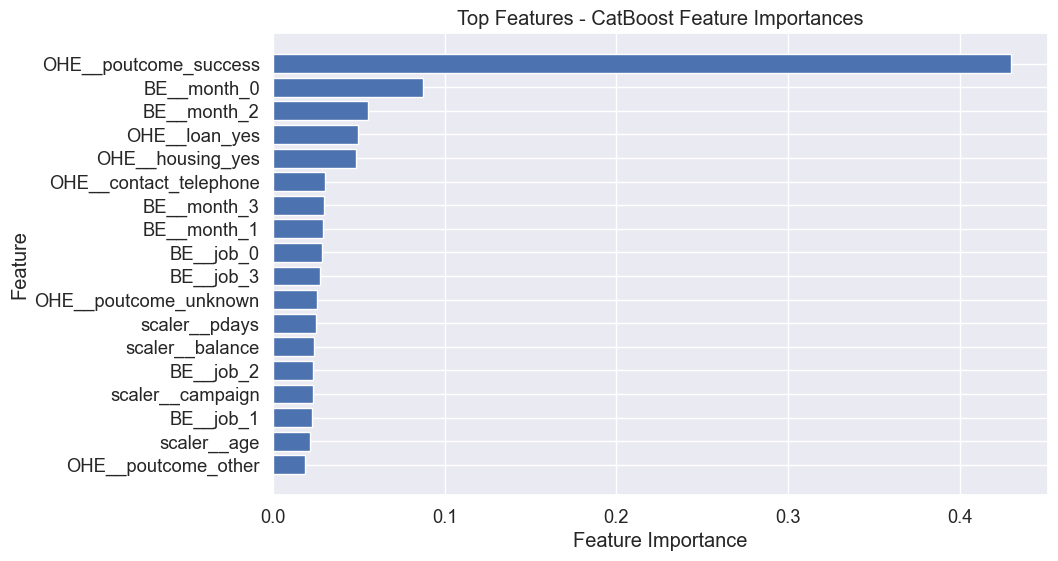

In [100]:
rucika_Tune_xGBC.fit(x_train,y_train)
# Get feature importance and names
feature_importances = rucika_Tune_xGBC.named_steps['Model_xGBC'].feature_importances_
feature_names = rucika_Tune_xGBC.named_steps['Preprocessing'].get_feature_names_out()

# Create a DataFrame for easier manipulation
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features - CatBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()

The most influential feature is `OHE__poutcome_success,` indicating that the outcome of the previous marketing campaign plays a substantial role in predicting the target variable. Additionally, categorical features related to months and job categories, as well as certain one-hot-encoded variables like `OHE__loan_yes` and `OHE__housing_yes` also exhibit notable importance. The significance of these features suggests their impact on the models decision-making process, aiding in the interpretation of key factors driving successful predictions.

## **Conclusion and Recommendation**

#### **Conclusion**

- Out of the 9 cross-validated models, the best-performing model for predicting whether a customer will deposit or not is the `Extreme Gradient Boosting` with tuning. This model achieved an F1 score of 72%.

- The optimal parameter tuning for this model includes:
    - `subsample`: 1.0
    - `reg_lambda`: 1 
    - `reg_alpha`: 1 
    - `n_estimators`: 50 
    - `min_child_weight`: 1 
    - `max_depth`: 10
    - `learning_rate`: 0.01 
    - `gamma`: 2
    - `colsample_bytree`: 0.8

#### **Recommendation**

- Additional Feature Inclusion: Consider adding more features, such as income, to enhance the model's performance. This can provide additional information that might be valuable in predicting the target variable.

- Detailed Data Input: Improve the input data by providing more detailed information to eliminate 'unknown' values. A more comprehensive dataset can contribute to better model training and predictions.

- Refinement of 'Poutcome' Feature: Restrict the 'Poutcome' feature to only include unique values like 'success' and 'failure.' This can simplify the feature and potentially improve the model's ability to capture the meaningful outcomes of the previous marketing campaigns.

## **Save Model**

In [101]:
import pickle

best_model = random_search_xgb.best_estimator_
bank_model = best_model.fit(x, y)
pickle.dump(bank_model, open('xgb_model.sav', 'wb'))